# Test du programme

Afin de tester la véracité du programme, on peu lui ajouter une image via path (mettre le path en entier pour windows)

La prediction prend en compte (bonus), l'etat de la pneumonie si s'en est une (virus ou bacterie)

The image is VIRUS PNEUMONIA


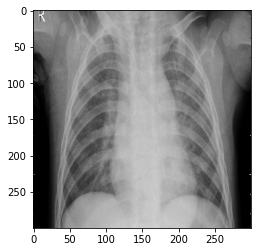

In [4]:
path = 'chest_Xray/test/PNEUMONIA/person61_virus_118.jpeg'

import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

MAX_SIZE = 100

CATEGORIES = ["NORMAL", "PNEUNOMIA"]

model = tf.keras.models.load_model("normal-pneumonia.model")
model2 = tf.keras.models.load_model("virus-bacteria.model")

def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (MAX_SIZE, MAX_SIZE))
    plt.imshow(new_array, cmap = 'gray')
    plt.show()
    return new_array.reshape(-1, MAX_SIZE, MAX_SIZE, 1)

img = image.load_img(path, target_size=(300,300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis =0)

images = np.vstack([x])

classes = model(images)
classes_pneu = model2(images)

if classes[0]> 0.5:
    if classes_pneu[0] > 0.5:
        print('The image is VIRUS PNEUMONIA')
        plt.imshow(img)
    else:
        print('The image is BACTERIAN PNEUMONIA')
        plt.imshow(img)
else:
    print('The image is NORMAL')
    plt.imshow(img)